<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/Jurik%20moving%20average%20rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import math
df = pdr.get_data_yahoo("V","1/1/2019","9/1/2019")
Period = 33
Period = max([Period,1])

In [120]:
length = 33
power = 4

In [121]:
def Jurik(df, length):
  beta = 0.45 * (length - 1) / (0.45 * (length - 1) + 2)
  alpha = math.pow(beta, power)
  e0 = [0]
  e_zero = []
  for i in range(len(df)):
    a = (1-alpha)*df.Close[i]+alpha * e0[i]
    e_zero.append(a)
    e0.append(a)
  e1 = [0]
  e_one = []
  for i in range(len(df)):
    b = (df.Close[i] - e_zero[i]) * (1-beta)+beta * e1[i]
    e_one.append(b)
    e1.append(b)
  jma = [0]
  e2 = [0]
  e_two = []
  jurik = []
  for i in range(len(df)):
    c = (e_zero[i] + 0.55 * e_one[i] - jma[i] ) * math.pow(1 - alpha, 2) + math.pow(alpha, 2) * e2[i]  
    e_two.append(c)
    e2.append(c)
    jma.append(e_two[i] + jma[i])
    jurik.append(e_two[i] + jma[i])
  q = pd.DataFrame({"Jurik":jurik,"Close":df.Close})
  q = q.iloc[20:]
  return q['Jurik'].shift(1)

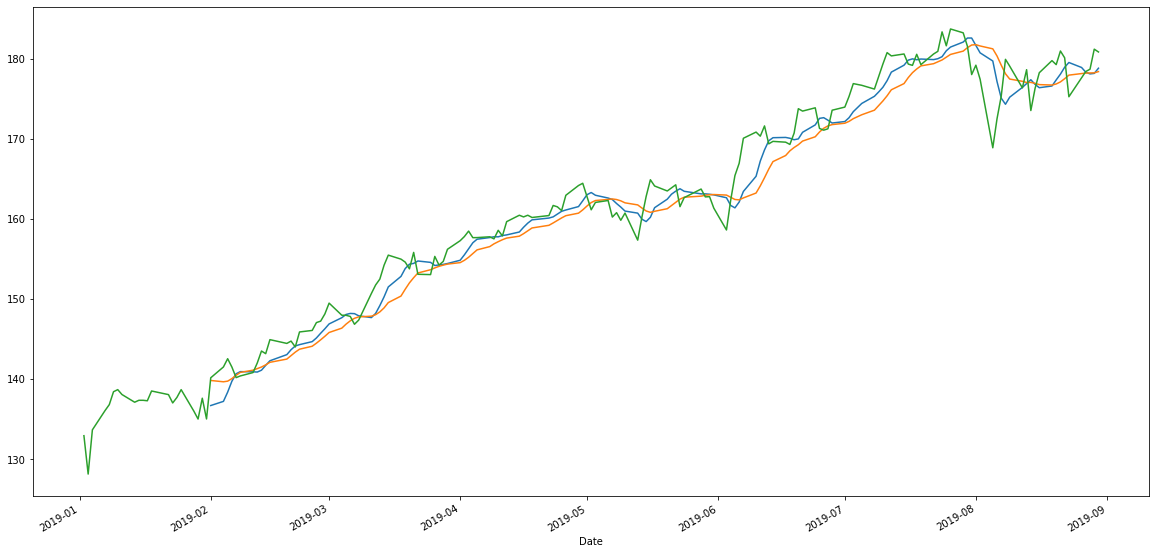

In [122]:
Jurik(df,20).plot(figsize = (20,10))
Jurik(df,40).plot()
df.Close.plot()

In [89]:
import math 
beta = 0.45 * (length - 1) / (0.45 * (length - 1) + 2)
alpha = math.pow(beta, power)

0.7709696609161215


In [90]:
e0 = [0]
e_zero = []
for i in range(len(df)):
  a = (1-alpha)*df.Close[i]+alpha * e0[i]
  e_zero.append(a)
  e0.append(a)

In [91]:
# e1 = 0.0,e1 := (_src - e0) * (1 - beta) + beta * nz(e1[1])
e1 = [0]
e_one = []
for i in range(len(df)):
  b = (df.Close[i] - e_zero[i]) * (1-beta)+beta * e1[i]
  e_one.append(b)
  e1.append(b)

In [92]:
# jma = 0.0, e2 = 0.0,e2 := (e0 + phaseRatio * e1 - nz(jma[1])) * 
#        pow(1 - alpha, 2) + pow(alpha, 2) * nz(e2[1])
    
# jma := e2 + nz(jma[1])

jma = [0]
e2 = [0]
e_two = []
jurik = []
for i in range(len(df)):
  c = (e_zero[i] + 0.55 * e_one[i] - jma[i] ) * math.pow(1 - alpha, 2) + math.pow(alpha, 2) * e2[i]  
  e_two.append(c)
  e2.append(c)
  jma.append(e_two[i] + jma[i])
  jurik.append(e_two[i] + jma[i])


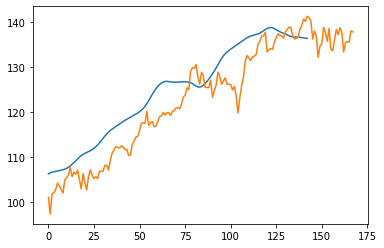

In [93]:
plt.plot(jurik[25:])
plt.plot(df.Close.values)

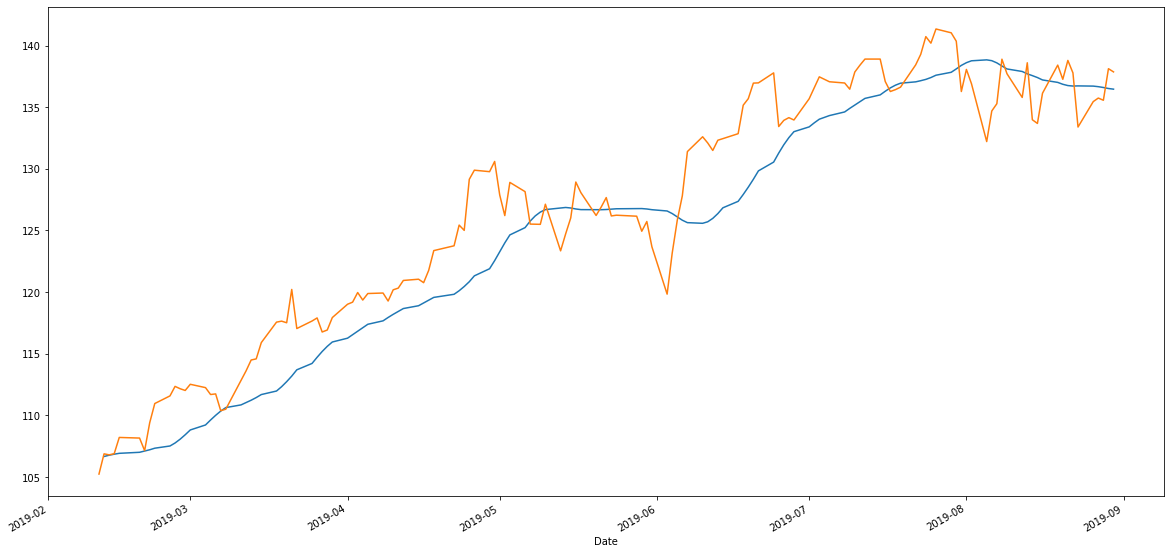

In [94]:
q = pd.DataFrame({"Jurik":jurik,"Close":df.Close})
q = q.iloc[27:]
q['Jurik'].shift(1).plot(figsize = (20,10))
q['Close'].plot()

In [76]:
q

,Jurik,Close
Date,,
2019-02-11,213.648721,208.720001
2019-02-12,213.649857,211.899994
2019-02-13,213.609596,212.800003
2019-02-14,213.578435,213.839996
2019-02-15,213.614974,216.470001
...,...,...
2019-05-24,245.644436,247.300003
2019-05-28,245.999545,246.309998
2019-05-29,246.203526,240.690002
